In [1]:
import argparse
from utils import ModelConfiguration, DataLoaderConfiguration
import os
from roar_experiment import experiment
from sensitive_transparency import sensitive_transparency
import torch
from pixel_perturbation_imagenet import create_folder, pixel_pertubation
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from plot_results_pixel_perturbation import pixel_perburtation_results

torch.manual_seed(0)
PATH = os.getcwd() + '/'
device = torch.device('cuda:0')
save_path = PATH + 'results/'

Completeness test passed for FullGrad.
[1.0, 3.0, 5.0, 7.000000000000001, 10.0]


In [5]:
model_config = ModelConfiguration(epochs=10, learning_rate=0.1, checkpoint_path=PATH + 'saved-models/', device=device, model_name='RESNET-50', experiment='extra', num_classes=2)
if not os.path.exists('dataset/extra_experiment/'):
    print('dataset does not exist and needs to be downloaded!')
else:
    loader_config = DataLoaderConfiguration(datasetname='extra_experiment', path=PATH)

    sensitive_transparency(model_config, loader_config)

fix_shape = math.ceil(math.sqrt(len(os.listdir(save_path))))
fig=plt.figure(figsize=(5, 5))

for i, name in enumerate(os.listdir(save_path)):
    image = mpimg.imread(save_path + '/' + name)
    fig.add_subplot(fix_shape, fix_shape, i+1)
    plt.imshow(image, interpolation='nearest')
plt.show()

RuntimeError: The size of tensor a (16) must match the size of tensor b (32) at non-singleton dimension 3

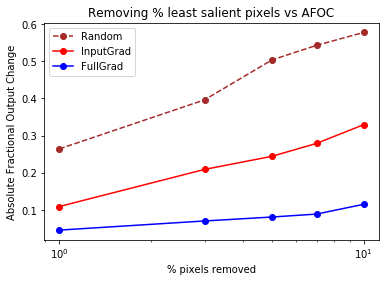

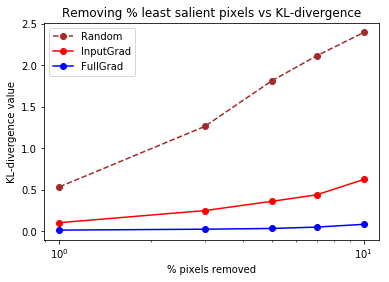

In [2]:
pixel_perburtation_results()

In [6]:
model_config = ModelConfiguration(epochs=80, learning_rate=0.01, device=device, checkpoint_path=PATH + 'saved-models/')
loader_config = DataLoaderConfiguration(path=PATH, data_dir='dataset/')
acc_list = experiment(model_config, loader_config)

x = [10, 30, 50, 70, 90]

plt.plot(x, acc_list[2], "--", marker = "|", c="brown",label = "Random")
plt.plot(x, acc_list[1], marker = "|", c="r", label = "Input grad")
plt.plot(x, acc_list[0], marker = "|", c="b", label = "Full grad")
plt.xlabel('% of pixels removed')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

Training of model based on 10.0% deletion of pixels.
batch: 0 | Loss: 2.428 | Acc: 59.375
batch: 1 | Loss: 1.990 | Acc: 64.844
batch: 2 | Loss: 1.295 | Acc: 84.375
batch: 3 | Loss: 2.027 | Acc: 64.062
batch: 4 | Loss: 2.107 | Acc: 66.406
batch: 5 | Loss: 1.952 | Acc: 68.750
batch: 6 | Loss: 1.492 | Acc: 68.750
batch: 7 | Loss: 1.762 | Acc: 70.312
batch: 8 | Loss: 2.129 | Acc: 61.719
batch: 9 | Loss: 1.827 | Acc: 65.625
batch: 10 | Loss: 1.652 | Acc: 68.750
batch: 11 | Loss: 2.047 | Acc: 57.812
batch: 12 | Loss: 1.713 | Acc: 62.500
batch: 13 | Loss: 1.945 | Acc: 61.719
batch: 14 | Loss: 2.413 | Acc: 53.906
batch: 15 | Loss: 2.726 | Acc: 51.562
batch: 16 | Loss: 2.501 | Acc: 48.438
batch: 17 | Loss: 2.674 | Acc: 35.938
batch: 18 | Loss: 2.306 | Acc: 50.781
batch: 19 | Loss: 2.875 | Acc: 39.844
batch: 20 | Loss: 2.572 | Acc: 46.094
batch: 21 | Loss: 2.971 | Acc: 39.062
batch: 22 | Loss: 2.655 | Acc: 48.438
batch: 23 | Loss: 3.224 | Acc: 38.281
batch: 24 | Loss: 3.277 | Acc: 38.281
batch: 

KeyboardInterrupt: 